### Introduction

In the following notebook, I will be exploring the listings data set to find potential relationships of interest.

**Read in libraries**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [7]:
#Set pandas preferences
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:.2f}'.format

#Set Visualization preferences
plt.style.use('bmh')

#Set path to save visualizations
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Visualizations\Listings EDA'

**Read in data**

In [8]:
#Set path to local machine
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\Data\02_Cleaned'

#Write file
df = pd.read_csv(path + '/2020_0520_Listings_Cleaned.csv', index_col=0,
                parse_dates=['host_since','last_review'])

### Data Overview

**Preview Data**

In [9]:
#Display data, print shape
print('Data shape:', df.shape)
display(df.head(3))

Data shape: (113994, 72)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_nights,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price,zipcode
0,*Full access to patio and backyard (shared wit...,3,"TV, Cable TV ,Internet,Wifi,Kitchen, Pets liv...",25,106,43,58,1.00,Real Bed,1.00,2.00,1,0,0,3 weeks ago,moderate,San Francisco,100.00,New update: the house next door is under const...,25.00,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,1.00,1169,1.00,1.00,1.00,"San Francisco, California, United States",Holly,90.00,within an hour,2008-07-31,"email , phone , facebook , reviews , kba",* No Pets - even visiting guests for a short t...,958,1,A family of 4 lives upstairs with their dog. N...,1,2020-03-13,37.77,STR-0001256,-122.43,1125,1,4200.00,"Bright, Modern Garden Unit - 1BR/1B",*Quiet cul de sac in friendly neighborhood *St...,Western Addition,Due to the fact that we have children and a do...,240,56,170.00,Apartment,0,0,1,10.00,10.00,10.00,10.00,10.00,97.00,9.00,1.84,Entire home/apt,100.00,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,1120.00,94117.00
1,"Our deck, garden, gourmet kitchen and extensiv...",5,"Internet,Wifi,Kitchen,Heating, Family/kid fri...",0,0,0,0,1.00,Real Bed,2.00,3.00,1,0,0,2 weeks ago,strict 14 with grace period,San Francisco,100.00,We live in a large Victorian house on a quiet ...,0.00,2009-05-03,2,Philip: English transplant to the Bay Area and...,1.00,8904,1.00,0.00,2.00,"San Francisco, California, United States",Philip And Tania,100.00,within a day,2009-03-02,"email , phone , reviews , kba , work ema...","Please respect the house, the art work, the fu...",5858,0,NaN,1,2017-08-06,37.75,STR-0001256,-122.42,60,30,5500.00,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,All the furniture in the house was handmade so...,111,0,235.00,Apartment,0,0,1,10.00,10.00,10.00,10.00,10.00,98.00,9.00,0.83,Entire home/apt,2.00,We live in a large Victorian house on a quiet ...,NaN,The train is two blocks away and you can stop ...,1600.00,94110.00
2,NaN,2,"TV,Internet,Wifi,Kitchen, Free street parking...",30,365,60,90,4.00,Real Bed,1.00,1.00,9,9,0,5 months ago,strict 14 with grace period,San Francisco,50.00,Nice and good public transportation. 7 minute...,12.00,2009-08-31,1,7 minutes walk to UCSF hospital & school campu...,1.00,21994,1.00,0.00,10.00,"San Francisco, California, United States",Aaron,100.00,within an hour,2009-06-17,"email , phone , reviews , jumio , govern...","No party, No smoking, not for any kinds of smo...",7918,0,NaN,1,2020-03-06,37.77,STR-0001256,-122.45,60,32,1685.00,A Friendly Room - UCSF/USF - San Francisco,"Shopping old town, restaurants, McDonald, Whol...",Haight Ashbury,Wi-Fi signal in common areas. Large eat in k...,19,2,65.00,Apartment,0,0,1,7.00,9.00,8.00,9.00,9.00,84.00,8.00,0.15,Private room,200.00,"Settle down, S.F. resident, student, hospital,...",Nice and good 

**Variable Info**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113994 entries, 0 to 7932
Data columns (total 72 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   access                                        71481 non-null   object        
 1   accommodates                                  113994 non-null  int64         
 2   amenities                                     113994 non-null  object        
 3   availability_30                               113994 non-null  int64         
 4   availability_365                              113994 non-null  int64         
 5   availability_60                               113994 non-null  int64         
 6   availability_90                               113994 non-null  int64         
 7   bathrooms                                     113994 non-null  float64       
 8   bed_type                                      113994 non

**View data description**

In [11]:
#View data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,113994.00,3.15,1.91,1.00,2.00,2.00,4.00,16.00
availability_30,113994.00,10.53,11.53,0.00,0.00,5.00,22.00,30.00
availability_365,113994.00,156.34,132.69,0.00,27.00,129.00,291.00,365.00
availability_60,113994.00,24.57,22.78,0.00,0.00,20.00,47.00,60.00
availability_90,113994.00,40.47,33.94,0.00,3.00,38.00,73.00,90.00
bathrooms,113994.00,1.39,0.91,0.00,1.00,1.00,1.50,14.00
bedrooms,113994.00,1.34,0.94,0.00,1.00,1.00,2.00,30.00
beds,113994.00,1.74,1.19,0.00,1.00,1.00,2.00,30.00
calculated_host_listings_count,113994.00,25.13,60.85,1.00,1.00,2.00,11.00,301.00
calculated_host_listings_count_private_rooms,113994.00,3.63,9.90,0.00,0.00,0.00,2.00,87.00


### Exploratory Data Analysis

#### Price

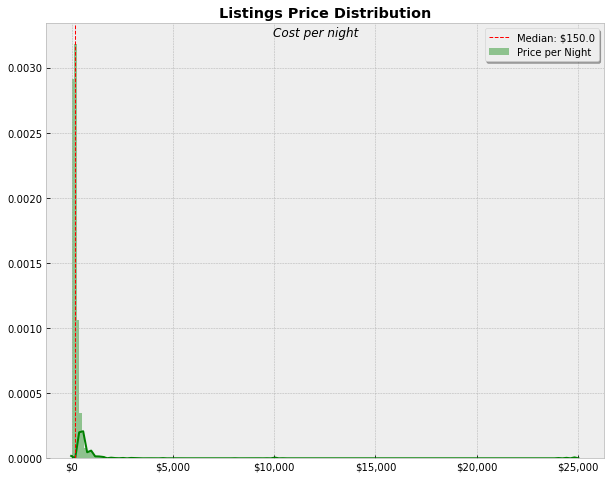

In [12]:
#Set figure
f, ax = plt.subplots(figsize = (10,8))

#Plot hist of price variable
j = sns.distplot(df.price, bins=200,ax = ax, color = 'green', label = 'Price per Night')

###Set Plot Aesthetics###
#Titles
j.set_title('Listings Price Distribution', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')

#PLot price median
median = df.price.median()
plt.axvline(median, color='r', linestyle='--',linewidth = 1,label = 'Median: ${}'.format(round(median)))

#legend
plt.legend(shadow = True, frameon =True)

#Save to Visualizations file
plt.savefig(eda_path + '/price_hist.png', bbox_inches='tight')

Airbnb offers a service known as Airbnb Luxe which offers pristine, expertly designed homes with luxury amenities, services, and a dedicated trip designer. This would explain the extreme rental prices for a one night stay

#### Prices by time

**Prep data**

In [13]:
#Subset target with last_review date
time = df.loc[:,['last_review','price']]

#Extract time data from last_review
time['year'] = df['last_review'].dt.year
time['month']= df['last_review'].dt.month_name()
time['weekday']= df['last_review'].dt.day_name()

#Set last review as index
time.set_index('last_review', inplace = True)

#Check
time.head(15)

,price,year,month,weekday
last_review,,,,
2020-03-13,170.00,2020.00,March,Friday
2017-08-06,235.00,2017.00,August,Sunday
2020-03-06,65.00,2020.00,March,Friday
2018-09-12,65.00,2018.00,September,Wednesday
2019-06-28,703.00,2019.00,June,Friday
2020-03-16,139.00,2020.00,March,Monday
2020-02-08,135.00,2020.00,February,Saturday
2019-05-27,150.00,2019.00,May,Monday
2015-05-17,120.00,2015.00,May,Sunday


**Month**

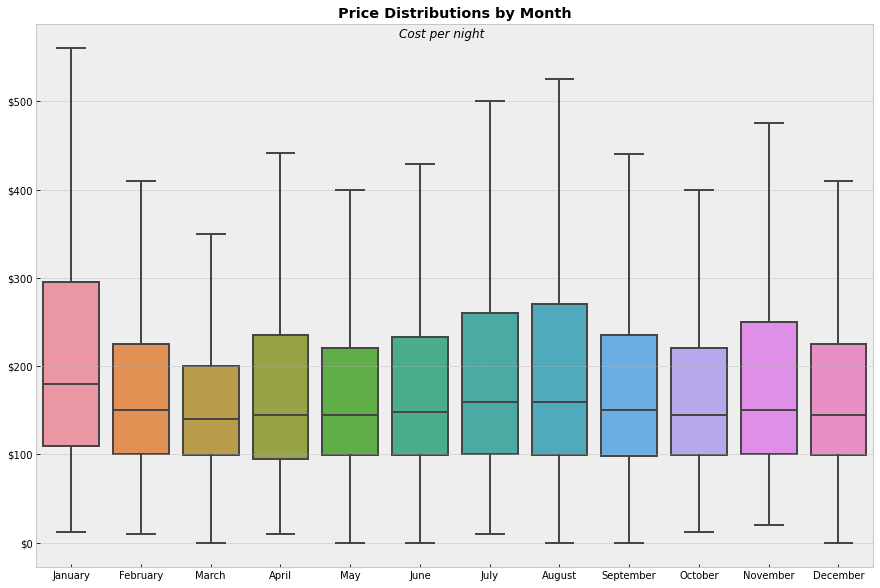

In [14]:
#Set figure size
f,ax = plt.subplots(figsize = (15,10))

#Plot data
j = sns.boxplot(x = 'month', y = 'price',
                order = ['January', 'February', 'March' ,'April', 'May', 'June', 'July', 
                         'August' ,'September', 'October' ,'November', 'December'],
                data = time, showfliers = False,ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Price Distributions by Month', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')
j.set_ylabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/month_price_box.png', bbox_inches='tight')

**Weekday**

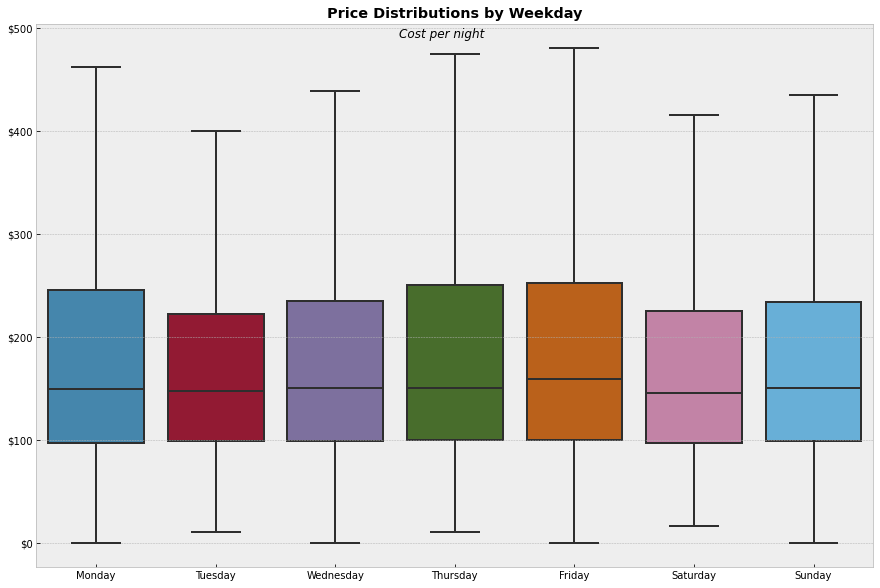

In [15]:
#Set figure size
f,ax = plt.subplots(figsize = (15,10))

#Plot data
j = sns.boxplot(x = 'weekday', y = 'price', data =time, showfliers = False,
                order=['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday'], ax =ax)

###Set plot aesthetics
#Titles
j.set_title('Price Distributions by Weekday', fontweight = 'semibold', )
plt.suptitle('Cost per night', y =.875, style = 'italic')

#Axes
j.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.set_xlabel('')
j.set_ylabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/weekday_price_box.png', bbox_inches='tight')

### Investigating Prices by neighborhood

In [16]:
#Import geopandas
import geopandas as gpd

#Set path to in SF geojson data
fname = r'C:\Users\kishe\Documents\Data Science\Projects\Python\In Progress\Airbnb - San Francisco\References/Airbnb Neighbourhoods.geojson'

#load geojson fit into neighborhoods
neighbourhoods = gpd.read_file(fname)

#Clean up neighborhoods
neighbourhoods.sort_values(by = 'neighbourhood', inplace=True)
neighbourhoods.drop('neighbourhood_group', inplace = True, axis = 1)

#Check
display(neighbourhoods.head())

,neighbourhood,geometry
20,Bayview,"MULTIPOLYGON (((-122.38811 37.74780, -122.3881..."
29,Bernal Heights,"MULTIPOLYGON (((-122.42825 37.73179, -122.4281..."
27,Castro/Upper Market,"MULTIPOLYGON (((-122.44644 37.76104, -122.4464..."
30,Chinatown,"MULTIPOLYGON (((-122.40877 37.79016, -122.4088..."
11,Crocker Amazon,"MULTIPOLYGON (((-122.42085 37.70833, -122.4238..."


In [17]:
#Assign average rent per night to geo data for plotting
neighbourhoods['avg_price']=df.groupby('neighbourhood_cleansed')['price'].mean().values

#Create coords column to plot neighborhood name on visualization
neighbourhoods['coords'] = neighbourhoods['geometry'].apply(lambda x: x.representative_point().coords[:])
neighbourhoods['coords'] = [coords[0] for coords in neighbourhoods['coords']]

#Check
display(neighbourhoods.head(10))

,neighbourhood,geometry,avg_price,coords
20,Bayview,"MULTIPOLYGON (((-122.38811 37.74780, -122.3881...",122.21,"(-122.38268808592301, 37.730317)"
29,Bernal Heights,"MULTIPOLYGON (((-122.42825 37.73179, -122.4281...",189.61,"(-122.41590699682232, 37.740382999999994)"
27,Castro/Upper Market,"MULTIPOLYGON (((-122.44644 37.76104, -122.4464...",252.27,"(-122.43585763549383, 37.762481)"
30,Chinatown,"MULTIPOLYGON (((-122.40877 37.79016, -122.4088...",185.09,"(-122.40705036483192, 37.7935845)"
11,Crocker Amazon,"MULTIPOLYGON (((-122.42085 37.70833, -122.4238...",129.08,"(-122.43733450367647, 37.7122445)"
4,Diamond Heights,"MULTIPOLYGON (((-122.43553 37.74146, -122.4356...",207.22,"(-122.44062808220588, 37.7410645)"
3,Downtown/Civic Center,"MULTIPOLYGON (((-122.40891 37.79013, -122.4088...",197.97,"(-122.41827825914024, 37.780164)"
12,Excelsior,"MULTIPOLYGON (((-122.44082 37.71646, -122.4382...",123.74,"(-122.41890070326417, 37.7239345)"
14,Financial District,"MULTIPOLYGON (((-122.39425 37.80007, -122.3942...",264.34,"(-122.39691958481856, 37.7910915)"
25,Glen Park,"MULTIPOLYGON (((-122.42418 37.74226, -122.4239...",232.04,"(-122.43249608759353, 37.7379035)"


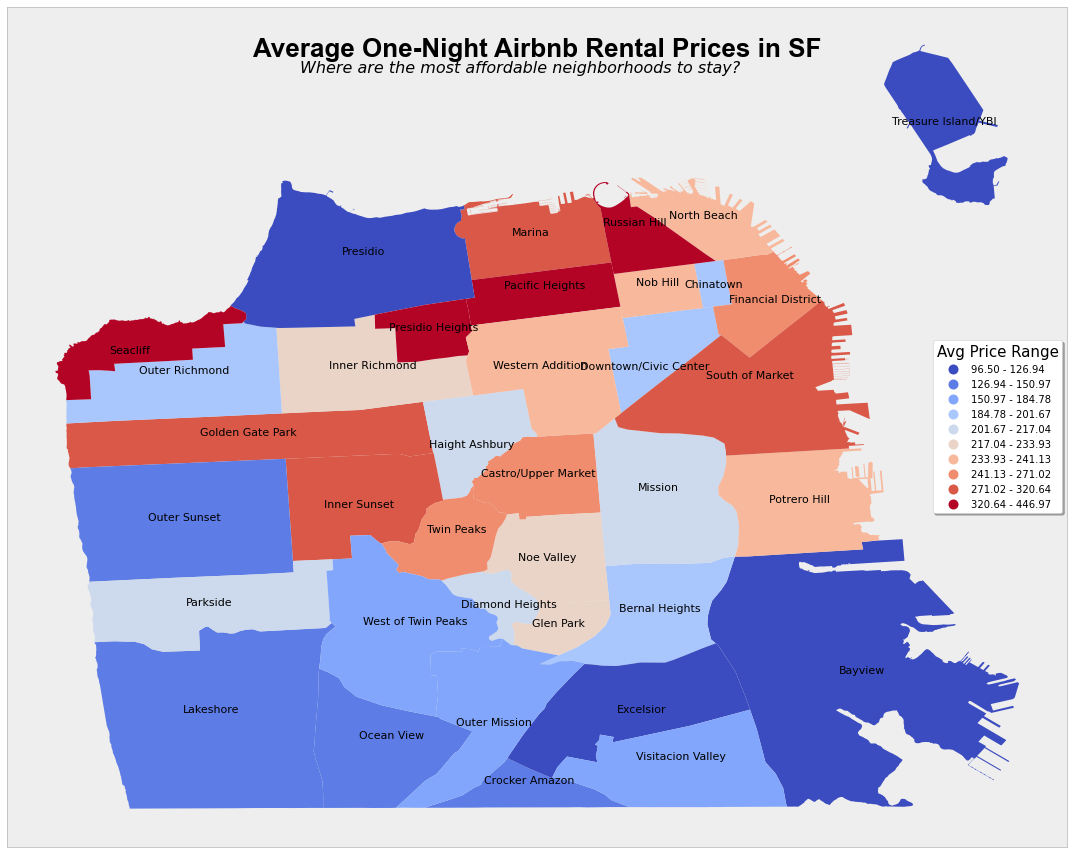

In [18]:
#Plot geodata to reflect average price for a one night stay per neighborhood
ax = neighbourhoods.plot(column ='avg_price', legend = True,cmap="coolwarm",
                        legend_kwds={'loc': 'right','title': 'Avg Price Range',
                                    'title_fontsize': 15,'facecolor': 'white',
                                      'shadow': True,},
                        scheme = 'quantiles',k=10, figsize=(19,19))

#Append neighborhood name to plot
for idx, row in neighbourhoods.iterrows():
    ax.annotate(s=row['neighbourhood'], xy=row['coords'],color = 'black',fontsize =11,
                 horizontalalignment='center')

###Set plot aesthetics###
#Title
ax.set_title('Average One-Night Airbnb Rental Prices in SF', fontsize =26,
              fontname='Arial',fontweight = 'semibold', pad = -50)

plt.suptitle('Where are the most affordable neighborhoods to stay?', y = .77, fontsize =16,
              style = 'italic')

#Ticks
ax.tick_params(axis='both', which='both',
                bottom = False, left=False,
                labelleft=False, labelbottom=False)
# plt.axis('off')
plt.grid(b=None)

#Save to Visualizations file
plt.savefig(eda_path + '/geopandas_rent.png', bbox_inches='tight')

### Exploring Airbnb Ownership

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**
- Which of these owners are renting out the entire home/apartment properties?
- What kinds of properties are these and how do they compare to other hosts
- Are these hosts also Super Hosts?

**Which hosts own the most Airbnb listings on the platform? Which hosts are the most popular(meaning, who has the most rented listings total)?**

In [19]:
#Capture host_ids with the most listings
property_counts = df.groupby(['host_id','host_name'])['id'].count().sort_values(ascending=False).reset_index()

#Rename cols and add total_listings_rank
property_counts.rename(columns = {'id' : 'total_listings'}, inplace= True)
property_counts['total_listings_rank'] = np.arange(start = 1, stop = len(property_counts) + 1, step = 1)

#Group hosts by unique count of id's
unique_properties = df.groupby(['host_id','host_name'])['id'].nunique().sort_values(ascending = False).reset_index()

#Rename cols
unique_properties.rename(columns = {'id' : 'unique_listings'}, inplace= True)
unique_properties['unique_listings_rank'] = np.arange(start = 1, stop = len(unique_properties) + 1, step = 1)

#Merge unique_properties and property_counts
host_info = pd.merge(unique_properties, property_counts, left_on=['host_id', 'host_name'],right_on=['host_id', 'host_name'])
host_info.set_index('host_id', inplace = True)

#Check
host_info.head()

,host_name,unique_listings,unique_listings_rank,total_listings,total_listings_rank
host_id,,,,,
48005494,Zeus,334,1,3653,1
219930816,Sonder (San Francisco),288,2,2537,3
107434423,Blueground,269,3,2615,2
4430421,Landmark,113,4,1431,4
103340667,Sheena,105,5,1034,5


**Which hosts are also Super Hosts?**

In [15]:
#Get list of hosts to capture superhost info about
hosts= host_info.index.tolist()

#Subset flags from main df and store as temp. Remove duplicates
temp = df[['host_id','host_is_superhost']].loc[(df.host_id.isin(hosts))].drop_duplicates()

#Group host_id's and apply sum to host_is_superhost. Superhosts will = 1
temp = temp.groupby('host_id')['host_is_superhost'].sum().reset_index().sort_values('host_is_superhost')

#Merge and set host_id as index
host_info = host_info.merge(temp, left_on='host_id', how='left',right_on='host_id')
host_info.set_index('host_id', inplace = True)

#Display
display(host_info.head(15))

,host_name,unique_listings,unique_listings_rank,total_listings,total_listings_rank,host_is_superhost
host_id,,,,,,
48005494,Zeus,334,1,3653,1,1.00
219930816,Sonder San Francisco,288,2,2537,3,0.00
107434423,Blueground,269,3,2615,2,0.00
4430421,Landmark,113,4,1431,4,0.00
103340667,Sheena,105,5,1034,5,0.00
262211596,Kevin,78,6,611,6,1.00
112282150,Sergey Tatyana,61,7,388,19,0.00
267895362,Zarina,56,8,460,14,1.00
70722023,Michael,55,9,594,8,1.00


- What kinds of properties are these and how do they compare to other hosts

4 of the top 5 hosts w/ most success on Airbnb are companies offering fully furnished apartments for rent in San Francisco

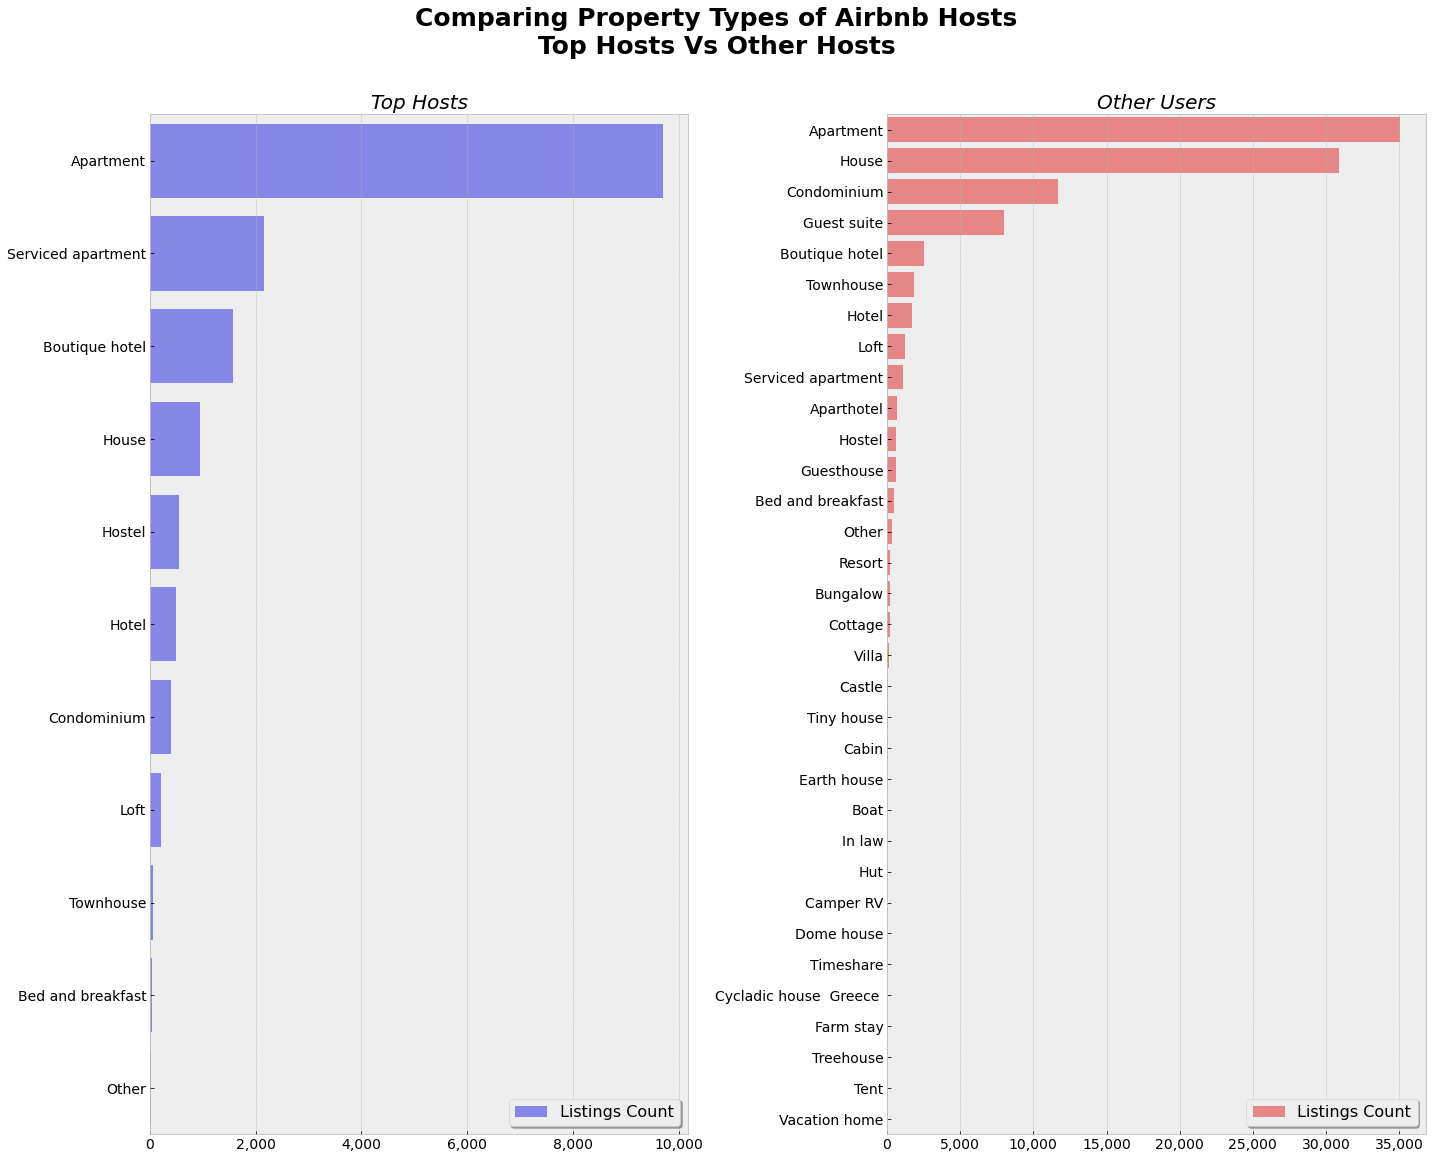

In [16]:
#Subsetting host_id's of the top 15
hosts = host_info[:15].index.tolist()

#Set figure
f, ax = plt.subplots(1,2, figsize = (20,15))

#Display kinds of properties available for rent
g =sns.countplot(y = 'property_type', order = df.property_type.loc[df.host_id.isin(hosts)].value_counts().index,
                 color='blue', alpha = .5,label = 'Listings Count',
              data = df.loc[df.host_id.isin(hosts)], ax = ax[0])

#Display kinds of properties of everyone else
j = sns.countplot(y = 'property_type', data = df.loc[~df.host_id.isin(hosts)],color='red', alpha = .5,label = 'Listings Count',
              order = df.property_type.loc[~df.host_id.isin(hosts)].value_counts().index,
              ax = ax[1])

###Set plot aesthetics###
#Title
plt.suptitle('Comparing Property Types of Airbnb Hosts\nTop Hosts Vs Other Hosts', y = 1.07, fontsize = 25, fontweight = 'semibold')

##Plot g##

#Title
g.set_title('Top Hosts',fontsize = 20, style = 'italic')

#Axes
g.set_xlabel('')
g.set_ylabel('')
g.tick_params(axis = 'both',labelsize = 14)
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


#Legend
g.legend(shadow = True, fontsize = 16, loc = 'lower right')

##Plot j##
#Title
j.set_title('Other Users',fontsize = 20, style = 'italic')

#Axes
j.set_xlabel('')
j.set_ylabel('')
j.tick_params(axis = 'both',labelsize = 14)
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#Legend
j.legend(shadow = True, fontsize = 16, loc = 'lower right')
f.tight_layout()

#Save to Visualizations file
plt.savefig(eda_path + '/property_comparisons.png', bbox_inches='tight')

### Comparing long-term rentals to local rent prices in San Francisco

**Prepare Data**

In [17]:
#Subset rows where monthly price is not na or minimum nights is >=28days
monthly_rent = df.loc[(df.minimum_nights >= 28)| ~(df.monthly_price.isna())]

#Fill missing monthly_price with price * minimum_nights
monthly_rent.monthly_price.fillna(monthly_rent.minimum_nights * monthly_rent.price, inplace = True)

#Check
display(monthly_rent.head(3))

C:\Users\kishe\Miniconda3\envs\EDA\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,calendar_updated,cancellation_policy,city,cleaning_fee,description,extra_people,first_review,guests_included,host_about,host_has_profile_pic,host_id,host_identity_verified,host_is_superhost,host_listings_count,host_location,host_name,host_neighbourhood,host_response_rate,host_response_time,host_since,host_verifications,house_rules,id,instant_bookable,interaction,is_location_exact,last_review,latitude,license,longitude,maximum_nights,minimum_nights,monthly_price,name,neighborhood_overview,neighbourhood_cleansed,notes,number_of_reviews,number_of_reviews_ltm,price,property_type,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,room_type,security_deposit,space,summary,transit,weekly_price,zipcode
0,Full access to patio and backyard shared wit...,3,TV Cable TV Internet Wifi Kitchen Pets liv...,25,106,43,58,1.00,Real Bed,1.00,2.00,1,0,0,3 weeks ago,moderate,San Francisco,100.00,New update the house next door is under const...,25.00,2009-07-23,2,We are a family with 2 boys born in 2009 and 2...,1.00,1169,1.00,1.00,1.00,San Francisco California United States,Holly,Duboce Triangle,90.00,within an hour,2008-07-31,email phone facebook reviews kba,No Pets even visiting guests for a short t...,958,1,A family of 4 lives upstairs with their dog N...,1,2020-03-13,37.77,STR 0001256,-122.43,1125,1,4200.00,Bright Modern Garden Unit 1BR 1B,Quiet cul de sac in friendly neighborhood St...,Western Addition,Due to the fact that we have children and a do...,240,56,170.00,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,97.0,9.0,1.84,Entire home apt,100.00,Newly remodeled modern and bright garden uni...,New update the house next door is under const...,Public Transportation is 1 2 block away Ce...,1120.00,94117.00
1,Our deck garden gourmet kitchen and extensiv...,5,Internet Wifi Kitchen Heating Family kid fri...,0,0,0,0,1.00,Real Bed,2.00,3.00,1,0,0,2 weeks ago,strict 14 with grace period,San Francisco,100.00,We live in a large Victorian house on a quiet ...,0.00,2009-05-03,2,Philip English transplant to the Bay Area and...,1.00,8904,1.00,0.00,2.00,San Francisco California United States,Philip And Tania,Bernal Heights,100.00,within a day,2009-03-02,email phone reviews kba work ema...,Please respect the house the art work the fu...,5858,0,NaN,1,2017-08-06,37.75,STR 0001256,-122.42,60,30,5500.00,Creative Sanctuary,I love how our neighborhood feels quiet but is...,Bernal Heights,All the furniture in the house was handmade so...,111,0,235.00,Apartment,0,0,1,10.0,10.0,10.0,10.0,10.0,98.0,9.0,0.83,Entire home apt,2.00,We live in a large Victorian house on a quiet ...,NaN,The train is two blocks away and you can stop ...,1600.00,94110.00
2,NaN,2,TV Internet Wifi Kitchen Free street parking...,30,365,60,90,4.00,Real Bed,1.00,1.00,9,9,0,5 months ago,strict 14 with grace period,San Francisco,50.00,Nice and good public transportation 7 minute...,12.00,2009-08-31,1,7 minutes walk to UCSF hospital school campu...,1.00,21994,1.00,0.00,10.00,San Francisco California United States,Aaron,Cole Valley,100.00,within an hour,2009-06-17,email phone reviews jumio govern...,No party No smoking not for any kinds of smo...,7918,0,NaN,1,2020-03-06,37.77,STR 0001256,-122.45,60,32,1685.00,A Friendly Room UCSF USF San Francisco,Shopping old town restaurants McDonald Whol...,Haight Ashbury,Wi Fi signal in common areas Large eat in k...,19,2,65.00,Apartment,0,0,1,7.0,9.0,8.0,9.0,9.0,84.0,8.0,0.15,Private room,200.00,Settle down S F resident student hospital ...,Nice and good public transportation 7 minute...,N Juda Muni and bus stop Street p

**Check price distribution w/ and w/o outliers

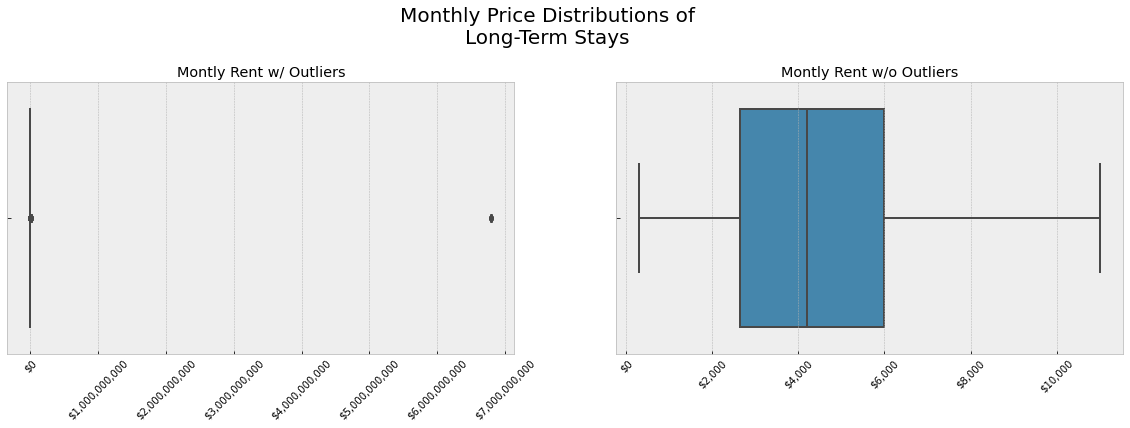

In [18]:
#Create figure
f, ax = plt.subplots(1,2,figsize = (20,5))

#Plot monthly prices, w/ and w/o outliers reflected
g = sns.boxplot(x = 'monthly_price', data = monthly_rent, showfliers = True, ax = ax[0])
j = sns.boxplot(x = 'monthly_price', data = monthly_rent, showfliers = False, ax = ax[1])

###Set plot aesthetics###
#Title
plt.suptitle('Monthly Price Distributions of\nLong-Term Stays', y = 1.09, fontsize = 20)

##Plot g##
#Title
g.set_title('Montly Rent w/ Outliers')

#Axes
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
g.tick_params(axis='x', rotation=45)
g.set_xlabel('')

##Plot j##
#Title
j.set_title('Montly Rent w/o Outliers')

#Axes
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
j.tick_params(axis='x', rotation=45)
j.set_xlabel('')

#Save to Visualizations file
plt.savefig(eda_path + '/monthly_rent_box.png', bbox_inches='tight')

**Remove outliers from monthly_rent and prepare as time series**

In [19]:
###Using IQR to remove outliers###
#Calulate IQR 
q1, q3 = np.quantile(monthly_rent.monthly_price, (.25, .75))
IQR = q3 - q1

#Calculate threshold
lower, upper = (q1 - (IQR * 1.5)),(q3 + (IQR * 1.5))

#Drop outliers from monthly_rent
monthly_rent = monthly_rent.loc[monthly_rent.monthly_price < upper]

#Subset cols for time series
time_series = monthly_rent.filter(regex ='monthly_price|last')

#Extract month_year
time_series['month_year'] = time_series.last_review.dt.to_period('M')

#Groupby month_year and capture mean and median of monthly_price
time_series = time_series.groupby('month_year')['monthly_price'].agg(['median','mean'])

#Check 
time_series.head()

<ipython-input-19-72140ace1525>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_series['month_year'] = time_series.last_review.dt.to_period('M')


,median,mean
month_year,,
2010-10,3750.00,3750.00
2011-05,3000.00,3000.00
2011-09,2700.00,2700.00
2011-11,3400.00,3400.00
2012-02,2000.00,2000.00


### Comparing local renter's market to Airbnb long-term hosts

**Read in/prepare Zillow Data**

In [20]:
#Read in Zillow data
zillow = pd.read_csv(path + '/2020_0526_Zillow_Cleaned.csv', index_col=0, parse_dates=['month_year'])

#Subset infromation pertaining to San Francisco and store as sf_rent
sf_rent = zillow.loc[zillow.regionname.str.contains('San Fran')]

#Set month_year as index
sf_rent.set_index('month_year', inplace = True)

#Check
display(sf_rent.head())

,regionname,rent
month_year,,
2014-01-01,"San Francisco, CA",2043.00
2014-02-01,"San Francisco, CA",2101.00
2014-03-01,"San Francisco, CA",2105.00
2014-04-01,"San Francisco, CA",2121.00
2014-05-01,"San Francisco, CA",2191.00


**SF Rental Time plot**

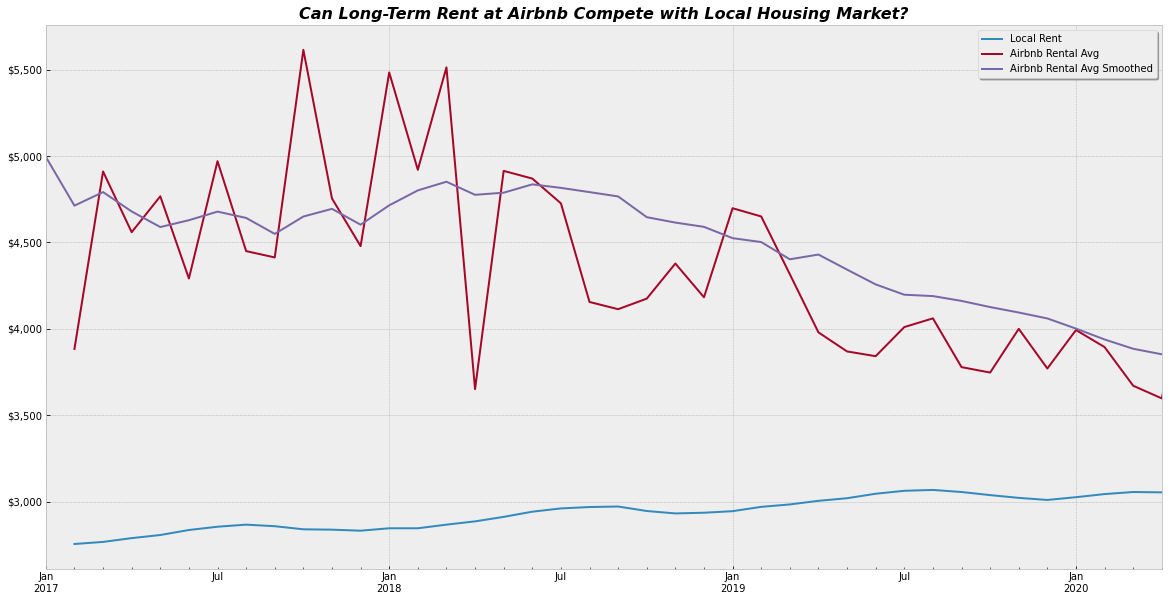

In [21]:
#Create figure
f, ax = plt.subplots(figsize = (20,10))

#Plot sf rental data
sf_rent.iloc[sf_rent.index > '2017-01-01'].plot(ax = ax, label = 'SF AVG Rent')

#Plot Airbnb data
time_series['mean'].iloc[time_series.index > '2017-01-01'].plot(ax = ax, label = 'Airbnb Avg Rent')
time_series.iloc[time_series.index > '2016-01-01']['mean'].rolling(12,6).mean().plot(ax = ax, label = 'SF AVG Rent')

###Set plot aesthetics###
#Title
ax.set_title('Can Long-Term Rent at Airbnb Compete with Local Housing Market?', fontweight = 'semibold', style = 'italic',fontsize = 16)

#Axes
ax.set_xlabel('')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

#Set xlim
ax.set_xlim('2017-01-01', '2020-04-01')

#Legend
ax.legend(['Local Rent', 'Airbnb Rental Avg', 'Airbnb Rental Avg Smoothed'],shadow = True, fontsize = 10);

#Save to Visualizations file
plt.savefig(eda_path + '/rent_comaprison.png', bbox_inches='tight')

Trends do seem to indicate that maybe one day Airbnb will be able to compete.